In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve, roc_curve,auc,roc_auc_score

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier

from ast import literal_eval

#ignore errors
import warnings as wn

wn.filterwarnings('ignore')

In [3]:

colors1 = [    
          (15/255,114/255,255/255,1), # blue 
          (224/255,0/255,193/255,.88), #pink
          (1.0, 0.807843137254902, 0.0392156862745098, 1), #orange
          (0.95, 0, 0, 1), #red
          (0, 0.6666666666666666, 0.6274509803921569, 1), #green
          
          (0, 0.9764705882352941, 0, 0.5), #       
          (10/255,10/255, 130/255, 1), #(0.4, 0.0, 0.6, 1), # green
          (0.6, 0/255, 0.4, 0.8)#
        ]

colors2= [
          (0/255,0/255, 255/255, 1), # dark blue
          (0/255,161/255, 255/255, 1), # blue 
          (61/255,161/255,255/255,1), #light blue
          (124/255, 220/255,255/255,1), #light blue
          (0/255,240/255,255/255,1), #light blue
        ]



colors2= [
          (10/255,10/255, 130/255, 1), # light blue
          (10/255,10/255, 160/255, 1),
          (10/255,10/255, 190/255, 1),
          (10/255,10/255, 220/255, 1),
          (10/255,10/255, 250/255, 1), # dark blue
          
        ]

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/lucas-fpaiva/AnalisePred_I/main/Projeto/car_eval/data_processed.csv', index_col=0)
results = pd.read_csv("https://raw.githubusercontent.com/lucas-fpaiva/AnalisePred_I/main/Projeto/car_eval/Car_results.csv",index_col=0)
features = data.columns[1:-2]

In [3]:
data.head()

,class,buying_price_vhigh,buying_price_high,buying_price_med,buying_price_low,maintenance_price_vhigh,maintenance_price_high,maintenance_price_med,maintenance_price_low,doors_2,...,persons_4,persons_more,luggage_boot_size_small,luggage_boot_size_med,luggage_boot_size_big,safety_low,safety_med,safety_high,id,fold
0,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,5
1,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,5
2,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,2,5
3,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,3,4
4,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,4,2


### Parâmetros dos dois melhores modelos

In [19]:
best_models = pd.concat([results[results.Modelo=='SVM'],results[results.Modelo=='PMC']],axis=0)
best_models = best_models.round(decimals=3).astype(str)
print(best_models[['Modelo', 'Parâmetros', 'Acurácia', 'F1-Score','ROC-AUC',"Fold"]].to_latex(escape=False,index=False,bold_rows=True,decimal=',',index_names=False))

\begin{tabular}{llllll}
\toprule
Modelo &                                         Parâmetros & Acurácia & F1-Score & ROC-AUC & Fold \\
\midrule
   SVM &  {'C': 10, 'kernel': 'rbf', 'probability': True... &      1.0 &      1.0 &     1.0 &    1 \\
   SVM &  {'C': 10, 'kernel': 'rbf', 'probability': True... &    0.997 &     0.99 &     1.0 &    2 \\
   SVM &  {'C': 10, 'kernel': 'poly', 'probability': Tru... &      1.0 &      1.0 &     1.0 &    3 \\
   SVM &  {'C': 10, 'kernel': 'poly', 'probability': Tru... &      1.0 &      1.0 &     1.0 &    4 \\
   SVM &  {'C': 10, 'kernel': 'rbf', 'probability': True... &      1.0 &      1.0 &     1.0 &    5 \\
   PMC &  {'activation': 'relu', 'hidden_layer_sizes': 3... &      1.0 &      1.0 &     1.0 &    1 \\
   PMC &  {'activation': 'relu', 'hidden_layer_sizes': 1... &    0.994 &    0.988 &     1.0 &    2 \\
   PMC &  {'activation': 'relu', 'hidden_layer_sizes': 2... &    0.994 &    0.996 &   0.999 &    3 \\
   PMC &  {'activation': 'relu', 'hidden

In [34]:
for model in ['SVM','PMC']:
    for i in range(1,6):
        prov = results[results.Modelo==model]
        print(prov[prov.Fold==i]['Parâmetros'].values)

["{'C': 10, 'kernel': 'rbf', 'probability': True, 'random_state': 0}"]
["{'C': 10, 'kernel': 'rbf', 'probability': True, 'random_state': 0}"]
["{'C': 10, 'kernel': 'poly', 'probability': True, 'random_state': 0}"]
["{'C': 10, 'kernel': 'poly', 'probability': True, 'random_state': 0}"]
["{'C': 10, 'kernel': 'rbf', 'probability': True, 'random_state': 0}"]
["{'activation': 'relu', 'hidden_layer_sizes': 30, 'learning_rate': 'constant', 'learning_rate_init': 0.05, 'max_iter': 200, 'random_state': 0}"]
["{'activation': 'relu', 'hidden_layer_sizes': 15, 'learning_rate': 'constant', 'learning_rate_init': 0.05, 'max_iter': 200, 'random_state': 0}"]
["{'activation': 'relu', 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'learning_rate_init': 0.05, 'max_iter': 200, 'random_state': 0}"]
["{'activation': 'relu', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 200, 'random_state': 0}"]
["{'activation': 'relu', 'hidden_layer_sizes': 10, 'learnin

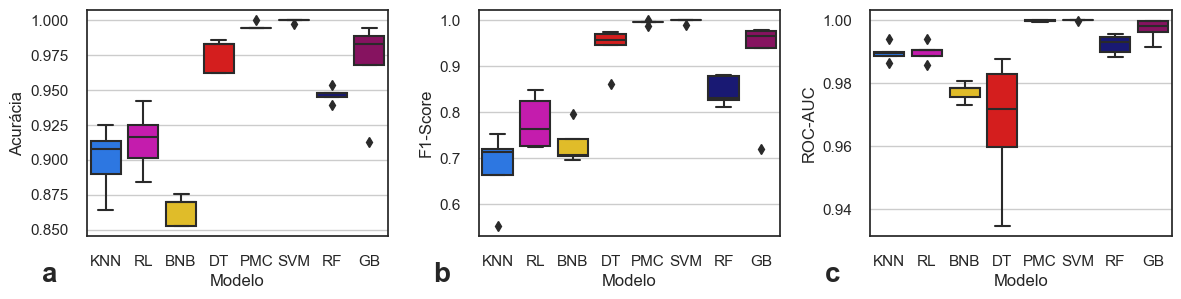

In [25]:
fig = plt.figure(figsize = (14,3),dpi=100)
axes = gridspec.GridSpec(nrows=1, ncols=3, figure=fig, wspace=0.3, hspace=0)
sns.set_theme(style="white", palette=None)
metrics =results.columns[0:-3]
r = [0,0,0]
c = [0,1,2]
count=0

im = ['a','b','c','d']
for metric in metrics:
    ax = fig.add_subplot(axes[r[count],c[count]])
    ax.grid()
    sns.boxplot(y=results[metric],x=results['Modelo'],ax=ax,palette=colors1)
    ax.text(-0.15, -0.2, im[count], size=20, weight='bold', transform=ax.transAxes)
    count+=1
plt.savefig('fig_metrics.pdf', format="pdf", dpi=1000, bbox_inches="tight")

In [9]:
tabel = results.groupby(['Modelo']).mean().round(decimals=3).astype(str) + '$\mp$' + results.groupby(['Modelo']).std().round(decimals=3).astype(str)
print(tabel.drop('Fold',axis=1).reset_index().to_latex(escape=False,index=False,bold_rows=True,decimal=',',index_names=False))

\begin{tabular}{llll}
\toprule
Modelo &         Acurácia &         F1-Score &          ROC-AUC \\
\midrule
   BNB &  0.864$\mp$0.011 &  0.729$\mp$0.041 &  0.977$\mp$0.003 \\
    DT &  0.975$\mp$0.012 &  0.941$\mp$0.046 &  0.967$\mp$0.021 \\
    GB &  0.969$\mp$0.033 &  0.916$\mp$0.111 &  0.997$\mp$0.003 \\
   KNN &    0.9$\mp$0.024 &  0.681$\mp$0.078 &   0.99$\mp$0.003 \\
   PMC &  0.995$\mp$0.003 &  0.995$\mp$0.005 &      1.0$\mp$0.0 \\
    RF &  0.947$\mp$0.005 &  0.846$\mp$0.032 &  0.992$\mp$0.003 \\
    RL &  0.914$\mp$0.022 &  0.778$\mp$0.057 &   0.99$\mp$0.003 \\
   SVM &  0.999$\mp$0.001 &  0.998$\mp$0.005 &      1.0$\mp$0.0 \\
\bottomrule
\end{tabular}



### Gerando matriz de confusão média e curva roc média por modelo

In [14]:
def models (name,parameters):
    if name == 'DT':
        model = DecisionTreeClassifier(**parameters);
    elif name == 'RF':
        model = RandomForestClassifier(**parameters);
    elif name == 'KNN':
        model = KNeighborsClassifier(**parameters);
    elif name == 'RL':
        model = LogisticRegression(**parameters);
    elif name == 'SVM':
        model = SVC(**parameters);
    elif name == 'PMC':
        model = MLPClassifier(**parameters);
    elif name == 'BNB':
        model = BernoulliNB(**parameters);
    elif name == 'GB':
        model = GradientBoostingClassifier(**parameters);
    else :
        print('Model not found')
        model=None
    return model

### Matriz média

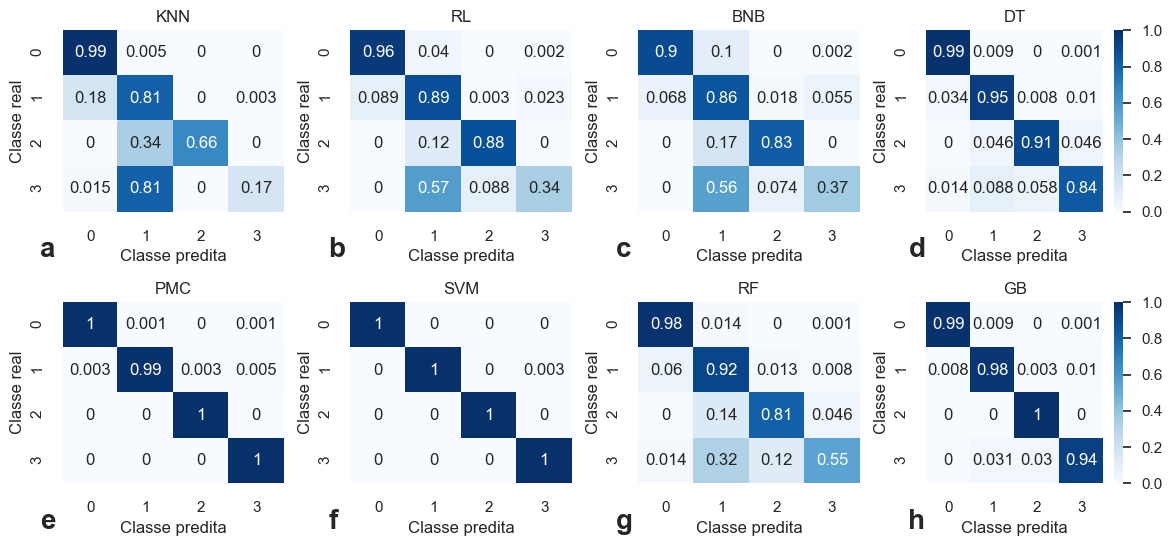

In [24]:
fig = plt.figure(figsize = (14,6),dpi=100)
axes = gridspec.GridSpec(nrows=2, ncols=4,wspace=0.3,hspace=0.5)

r = [0,0,0,0,1,1,1,1]
c = [0,1,2,3,0,1,2,3]

models_name =["KNN", "RL", "BNB", "DT", "PMC", "SVM", "RF", "GB"]      #, "DT", "PMC", "SVM", "RF", "GB"
im = ['a','b','c','d','e','f','g','h']
count=0
for name in models_name:
  conf_mean = 0
  
  for k in range(1,6):
    treino = data[data.fold!=k]
    teste  = data[data.fold==k]
    
    x_treino = treino[features]
    y_treino = treino['class']

    x_teste = teste[features]
    y_teste = teste['class']
    
    res_model = results[results["Modelo"]==name]
    parameters = literal_eval(res_model[res_model.Fold==1]['Parâmetros'].values[0])

    model = models(name,parameters);
    model.fit(x_treino, y_treino);
    y_pred = model.predict(x_teste);
    conf_mean = conf_mean + confusion_matrix(y_teste, y_pred,normalize='true')
    
  conf_mean = np.round(conf_mean/5,3)
  
  ax = fig.add_subplot(axes[r[count],c[count]])
  ax.set_title(name)
  if count == 3 or count==7:
    sns.heatmap(conf_mean, annot=True,ax=ax,cmap='Blues', vmin=0, vmax=1)
  else:
    sns.heatmap(conf_mean, annot=True,ax=ax,cmap='Blues',cbar=False, vmin=0, vmax=1)
    
  ax.text(-0.1, -0.25, im[count], size=20, weight='bold', transform=ax.transAxes)
  ax.set_xlabel('Classe predita')
  ax.set_ylabel('Classe real')
  
  
  count+=1
plt.savefig('fig_confusion.pdf', format="pdf", dpi=1000, bbox_inches="tight")
plt.show()

### Curva roc média

In [13]:
features

Index(['buying_price_vhigh', 'buying_price_high', 'buying_price_med',
       'buying_price_low', 'maintenance_price_vhigh', 'maintenance_price_high',
       'maintenance_price_med', 'maintenance_price_low', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'luggage_boot_size_small', 'luggage_boot_size_med',
       'luggage_boot_size_big', 'safety_low', 'safety_med', 'safety_high'],
      dtype='object')

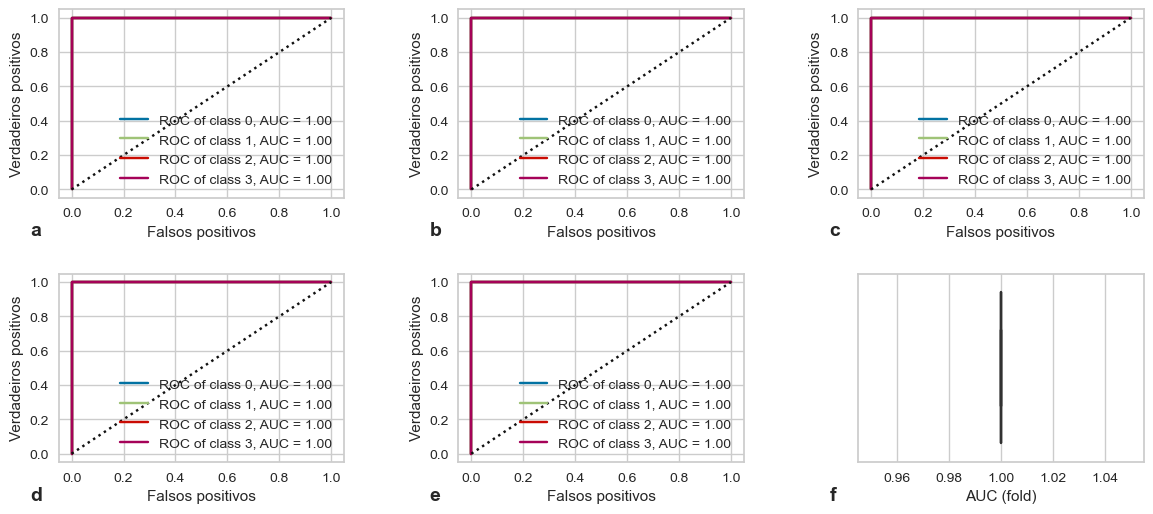

In [16]:
fig = plt.figure(figsize = (14,6),dpi=100)
axes = gridspec.GridSpec(nrows=2, ncols=3,wspace=0.4,hspace=0.4)

r = [0,0,0,1,1,1]
c = [0,1,2,0,1,2]

im = ['a','b','c','d','e','f','g','h']
count=0
name='SVM'
auc_ = []
for k in range(1,7):
  ax = fig.add_subplot(axes[r[count],c[count]])
  
  if k<6:
    treino = data[data.fold!=k]
    teste  = data[data.fold==k]
    
    x_treino = treino[features]
    y_treino = treino['class']

    x_teste = teste[features]
    y_teste = teste['class']
    
    res_model = results[results.Modelo==name]
    parameters = literal_eval(res_model[res_model.Fold==k]['Parâmetros'].values[0])

    model = models(name,parameters);
  
    visualizer = ROCAUC(model, classes=["0", "1", "2", "3"],ax=ax,micro=False, macro=False)
    visualizer.fit(x_teste, y_teste)        # Fit the training data to the visualizer
    auc_.append(visualizer.score(x_teste, y_teste,))       # Evaluate the model on the test data
    #ax.set_xlim([-0.001,0.02])
    #ax.set_ylim([0.98,1.001])
    ax.set_xlabel('Falsos positivos')
    ax.set_ylabel('Verdadeiros positivos')
    ax.legend()
  
  
  else:
    sns.boxplot(x=auc_,ax=ax)
    ax.set_xlabel('AUC (fold)')
  ax.text(-0.1, -0.2, im[count], size=14, weight='bold', transform=ax.transAxes)
  
  count+=1
plt.savefig('fig_roc.pdf', format="pdf", dpi=1000, bbox_inches="tight")
plt.show()

### Vizualizando o modelo DT

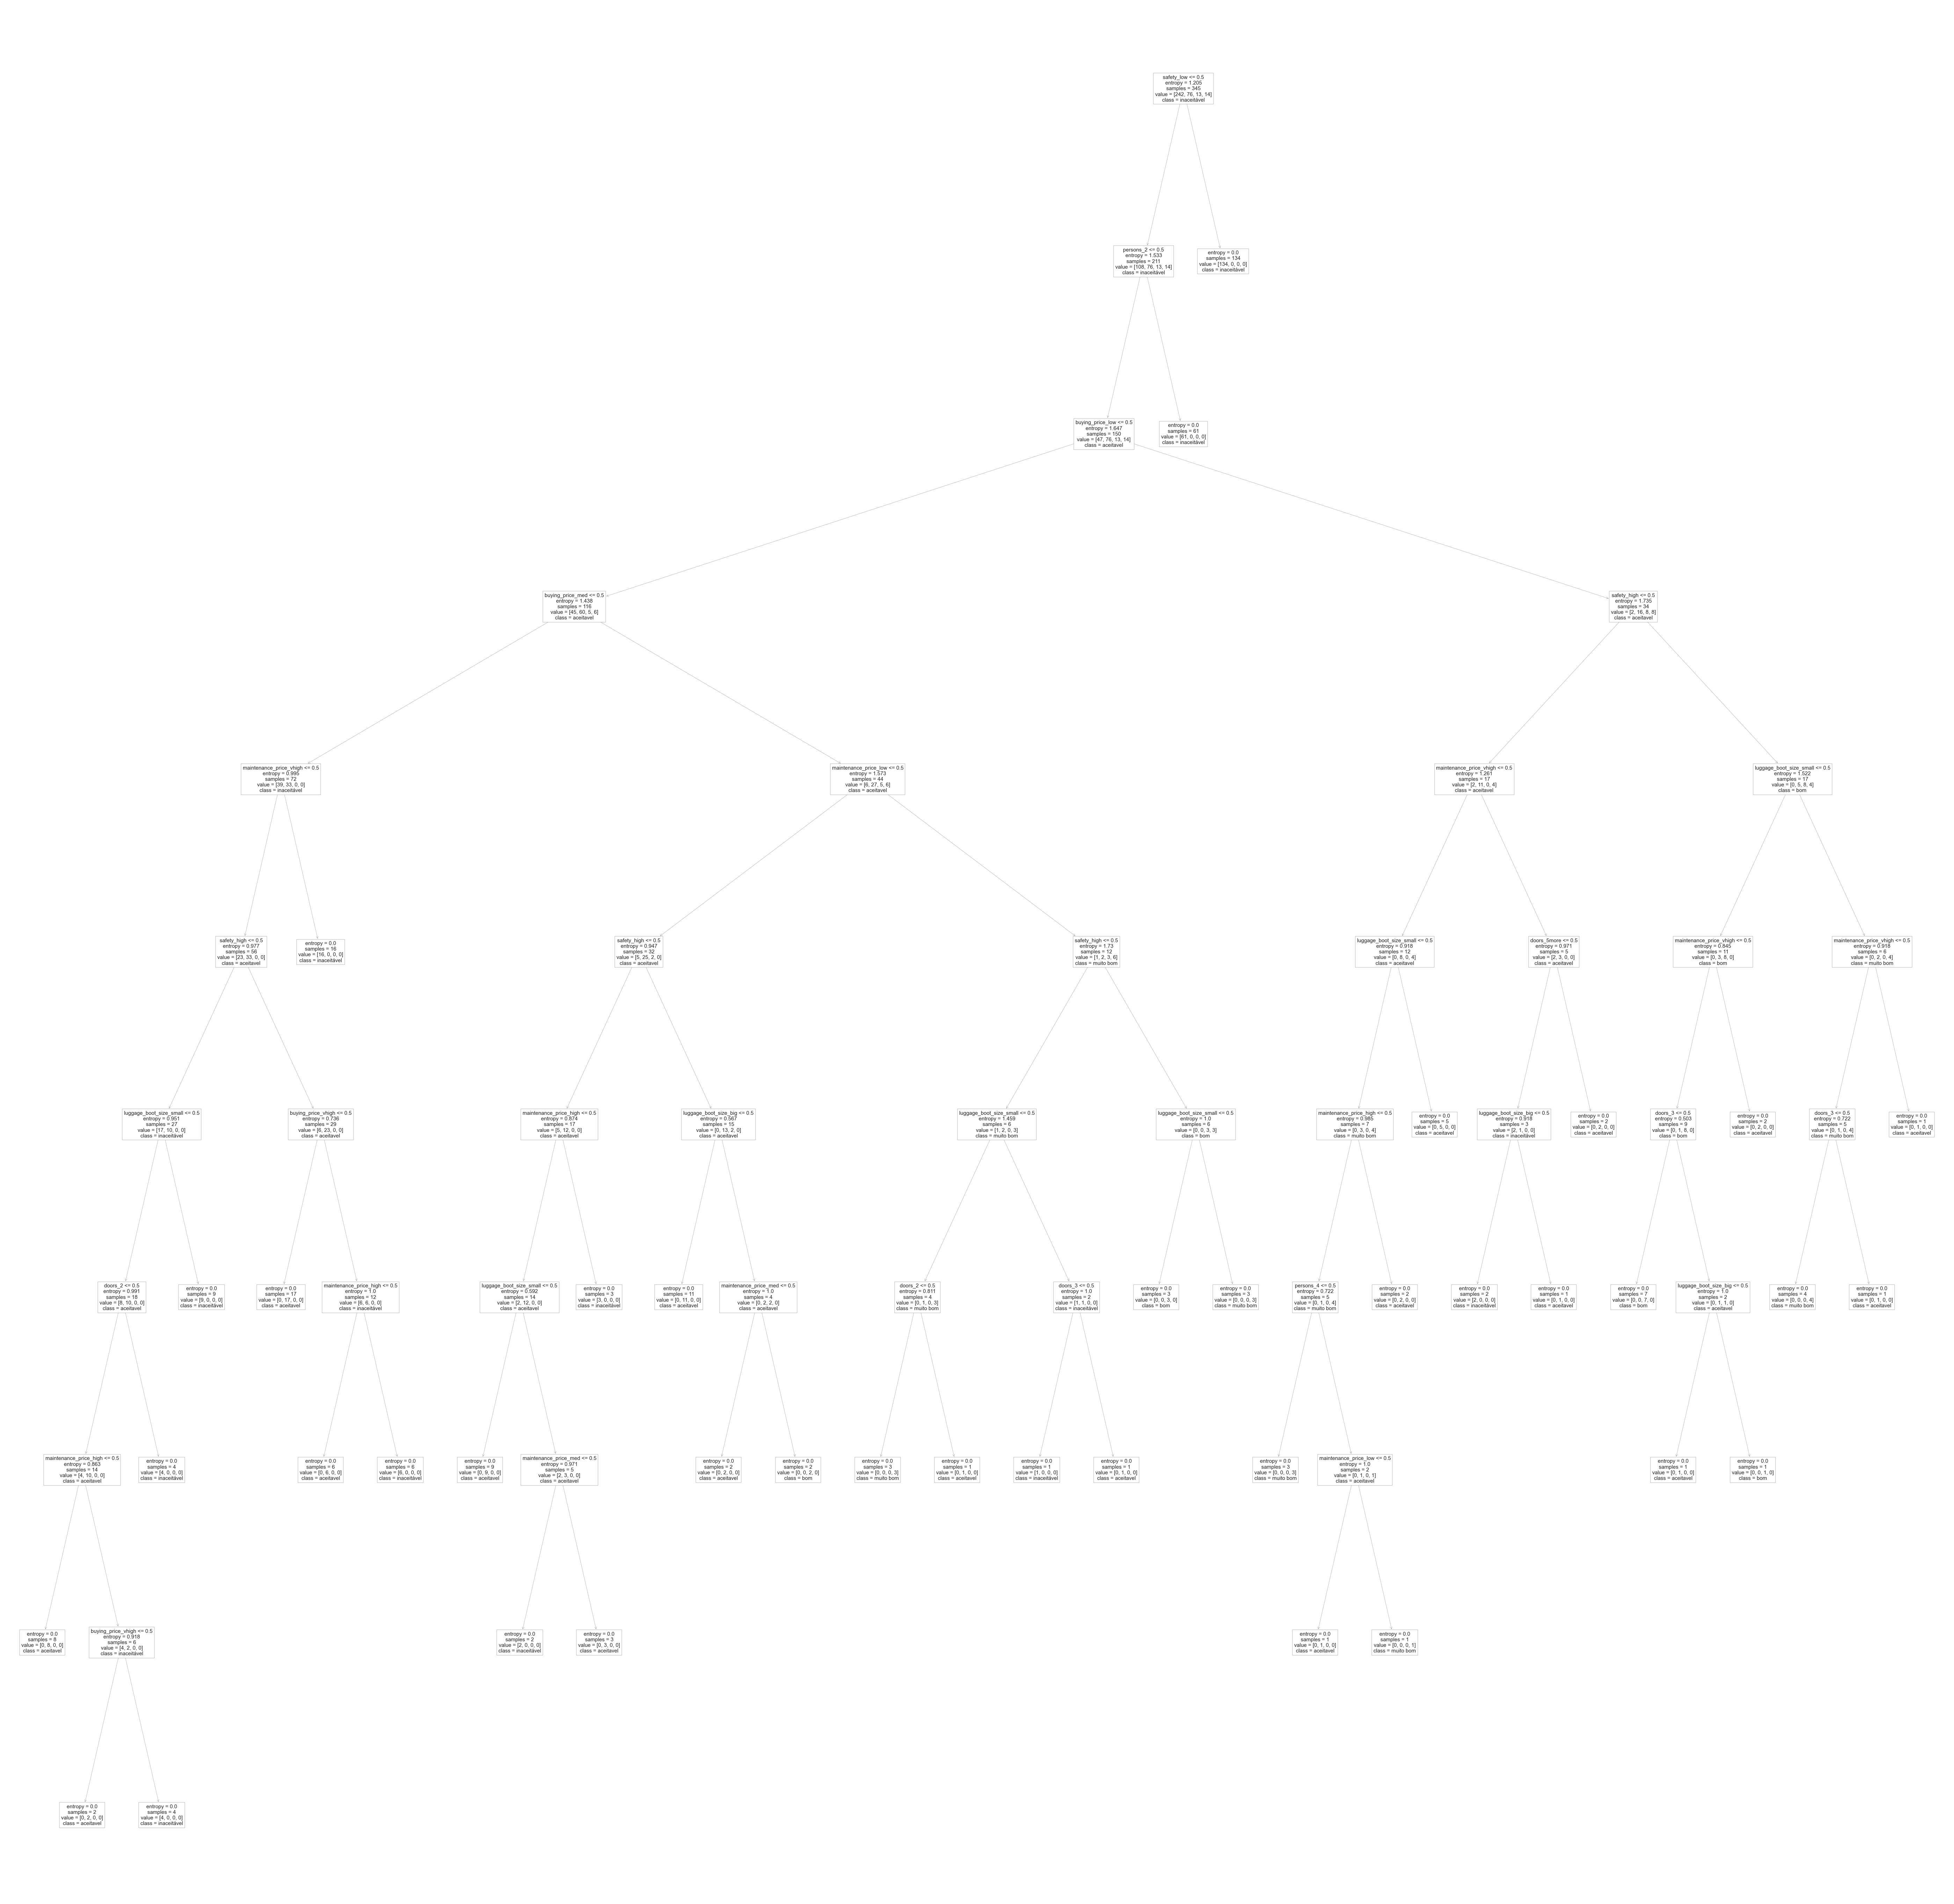

In [15]:
from sklearn.tree import  plot_tree
plt.figure(figsize=(100,100))
plot_tree(model,feature_names=features,class_names=['inaceitável','aceitavel','bom','muito bom'])
plt.savefig('tree.pdf',dp1=1000,bbbox_inches="tight")